In [ ]:
!pip install awscli

In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [35]:
import os
list_building = ['airport_terminal','burial_site','park','stadium','zoo']

In [36]:
for bui in list_building:
  os.mkdir(bui)



In [37]:
%cd ..


/content


In [ ]:
%cd airport_terminal
!aws s3 cp s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/airport_terminal/ . --recursive --no-sign-request
%cd ..

In [ ]:
%cd burial_site
!aws s3 cp s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/burial_site/ . --recursive --no-sign-request
%cd ..

In [ ]:
%cd park
!aws s3 cp s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/park/ . --recursive --no-sign-request
%cd ..

In [ ]:
%cd stadium
!aws s3 cp s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/stadium/ . --recursive --no-sign-request
%cd ..

In [ ]:
%cd zoo
!aws s3 cp s3://spacenet-dataset/Hosted-Datasets/fmow/fmow-rgb/train/zoo/ . --recursive --no-sign-request
%cd ..

In [17]:
%cd ..

/content


In [32]:
file_ = os.path.join('DataSet','zoo')
file_dest = os.path.join('NewDS','zoo')
#os.listdir(file_)
# dir1 = os.path.join(file_,'airport_terminal_0')
# os.listdir(dir1)

In [31]:
%cd ..

/content


In [33]:
from PIL import Image
import json

def portal_method(size):
  for sub_file1 in os.listdir(file_):
    dir1 = os.path.join(file_,sub_file1)
    for sub_file2 in os.listdir(dir1):
      dir2 = os.path.join(dir1,sub_file2)
      if os.path.splitext(dir2)[1] == '.json':
        with open(dir2) as f:
          try:
            data = json.load(f)
          except:
            continue
            reconstruct_from_config
          bbox = data['bounding_boxes'][0]['box']
          img_path = dir2[:-5]
          im_p = img_path + '.jpg'
          new_image = prepare_image(im_p,bbox,size,file_dest)
          os.remove(im_p)
          os.remove(dir2)

def prepare_image(image_path, bbox, size,output_dir):
    """
    Preprocesses an image for input to a CNN.

    :param image_path: Path to the input image.
    :type image_path: str
    :param bbox: Bounding box coordinates in the format (x_min, y_min, x_max, y_max).
    :type bbox: tuple
    :param size: Size of the output image in pixels.
    :type size: int
    :return: Preprocessed image as a numpy array.
    """
    # Open the image file
    try:
      image = Image.open(image_path)
    except :
      return
    # Enlarge the bounding box in proportion to its size
    width, height = image.size
    x_min, y_min, x_max, y_max = bbox
    if x_min > x_max or y_min > y_max:
      return
    box_width = x_max - x_min
    box_height = y_max - y_min
    box_size = max(box_width, box_height)
    new_x_min = max(0, x_min - box_size // 2)
    new_y_min = max(0, y_min - box_size // 2)
    new_x_max = min(width, x_max + box_size // 2)
    new_y_max = min(height, y_max + box_size // 2)
    bbox = (new_x_min, new_y_min, new_x_max, new_y_max)

    # Crop the image to the bounding box
    image = image.crop(bbox)
    # Resize the image for input to the CNN
    image = image.resize((size, size))
    # Convert the image to a numpy array
    filename = f"preprocessed_{os.path.basename(image_path)}"
    output_path = os.path.join(output_dir, filename)
    image.save(output_path)

portal_method(224)


In [42]:
import os
import shutil
file_destination = os.path.join('Test','airport_terminal')
file_source = os.path.join('NewDS','airport_terminal')


c = 0
for x in os.listdir(file_source):
  shutil.move(os.path.join(file_source,x), file_destination)
  if c == 60:
    break
  c += 1


In [38]:
!ls

DataSet  NewDS	sample_data  Test  Training


In [ ]:
#cuidado donde correr esto, asegurarse de estar en el directorio correcto
for fil in os.listdir(file_):
  dir1 = os.path.join(file_,fil)
  print(dir1)
  # for file in os.listdir(dir1):
      # if os.path.splitext(os.path.join(file_dir, file))[1] == '.json':
      #     print(os.path.splitext(os.path.join(file_dir, file))[1])
      # if file.endswith('.jpg') or file.endswith('.json'):
      #     os.remove(os.path.join(dir1,file))
      #     print('delete file,',os.path.join(file_dir, file))
  if os.path.isdir(os.path.join(file_, fil)):
    os.rmdir(os.path.join(file_, fil))
    print('a')

In [49]:
import os
file_dir = 'NewDS'
image_ext = ['jpeg','jpg','bmp','png']
os.listdir(file_dir)


['stadium', 'zoo', 'park', 'airport_terminal', 'burial_site']

In [48]:
%cd ..

/content


In [50]:
for x in os.listdir(file_dir):
  c = 0
  for y in os.listdir(os.path.join(file_dir,x)):
    if c >= 1000:
      os.remove(os.path.join(file_dir,x,y))
    c += 1

In [51]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import json
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [52]:
datagen = ImageDataGenerator(rescale=1./255)
train_dir = 'NewDS'
train_generator= datagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='categorical',batch_size=32)


num_classes = train_generator.num_classes

Found 5000 images belonging to 5 classes.


In [53]:
test_dir = 'Test'
test_generator = datagen.flow_from_directory(test_dir,target_size=(224,224),class_mode='categorical',batch_size=32)

Found 305 images belonging to 5 classes.


In [54]:
import os
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

# Ruta del conjunto de entrenamiento
ruta_entrenamiento = 'NewDS'

# Proporción del conjunto de validación
proporcion_validacion = 0.2

# Crear un objeto ImageDataGenerator
datagen = ImageDataGenerator(validation_split=proporcion_validacion,rescale=1./255)


# Cargar los datos de entrenamiento y validación utilizando ImageDataGenerator
train_generator = datagen.flow_from_directory(ruta_entrenamiento,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training',)
num_classes = train_generator.num_classes

val_generator = datagen.flow_from_directory(ruta_entrenamiento,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical',
                                            subset='validation',)

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación utilizando train_test_split
train_files, val_files = train_test_split(train_generator.filenames, test_size=proporcion_validacion, random_state=42)

# Imprimir el número de archivos en el conjunto de entrenamiento y validación
print(f'Número de archivos de entrenamiento: {len(train_files)}')
print(f'Número de archivos de validación: {len(val_files)}')

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Número de archivos de entrenamiento: 3200
Número de archivos de validación: 800


**Model**

In [55]:
pre = tf.keras.metrics.Precision()
acc = tf.keras.metrics.CategoricalAccuracy()
batch_size = 16


In [56]:
from keras.models import Model
from keras.layers import Input, concatenate, Dense, Dropout, Flatten,Reshape
from keras.applications.densenet import DenseNet121
from keras.applications.resnet import ResNet152
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras import backend

# Load DenseNet121 model
densenet_model = DenseNet121(weights='imagenet')

# Load ResNet152 model
resnet_model = ResNet152(weights='imagenet')

# # Load InceptionV3 model
#inception_model = InceptionV3(weights='imagenet')

# # Load Xception model
#ception_model = Xception(weights= 'imagenet')

# Define the input shape for all models
input_shape = (224, 224, 3)

# Define the input tensor for all models
input_tensor = Input(shape=input_shape)

# Get the output tensors for all models
densenet_output = densenet_model(input_tensor)
resnet_output = resnet_model(input_tensor)
#inception_output = inception_model(input_tensor)
#xception_output = xception_model(input_tensor)

# Concatenate the outputs of all models
merged = concatenate([densenet_output,resnet_output])

# Add a fully-connected layer with dropout and a logistic layer for the number of classes
x = Dense(1024, activation='relu')(merged)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)


# predicted_class = np.argmax(predictions,axis=1)
# reshape_layer = Reshape((1,))
# predicted_class_reshaped= reshape_layer(predicted_class)

# Define the model with input tensor and output tensor
model = Model(inputs=input_tensor, outputs=predictions)

# Compile the model with categorical cross-entropy loss and Adam optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=[acc,pre])


242900224/242900224 [==============================] - 11s 0us/step


In [57]:
logdir = 'logs'

In [58]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [59]:
history_model = model.fit(train_generator,epochs=8,steps_per_epoch=70,validation_data=val_generator,callbacks=[tensorboard_callback])

Epoch 1/8
70/70 [==============================] - 320s 1s/step - loss: 1.5238 - categorical_accuracy: 0.3688 - precision: 0.2857 - val_loss: 1.6373 - val_categorical_accuracy: 0.2000 - val_precision: 0.0000e+00
Epoch 2/8
70/70 [==============================] - 102s 1s/step - loss: 1.4224 - categorical_accuracy: 0.3518 - precision: 0.4154 - val_loss: 1.6505 - val_categorical_accuracy: 0.1980 - val_precision: 0.0000e+00
Epoch 3/8
70/70 [==============================] - 92s 1s/step - loss: 1.3848 - categorical_accuracy: 0.3772 - precision: 0.5034 - val_loss: 1.7277 - val_categorical_accuracy: 0.2000 - val_precision: 0.0000e+00
Epoch 4/8
70/70 [==============================] - 91s 1s/step - loss: 1.3211 - categorical_accuracy: 0.4420 - precision: 0.5607 - val_loss: 2.2156 - val_categorical_accuracy: 0.2350 - val_precision: 0.1495
Epoch 5/8
70/70 [==============================] - 91s 1s/step - loss: 1.3248 - categorical_accuracy: 0.4348 - precision: 0.5595 - val_loss: 2.1558 - val_cate

In [60]:
history_model.history

{'loss': [1.5238186120986938,
  1.4223601818084717,
  1.3847882747650146,
  1.3211380243301392,
  1.324782371520996,
  1.2762656211853027,
  1.2186176776885986,
  1.1691633462905884],
 'categorical_accuracy': [0.3687500059604645,
  0.35178571939468384,
  0.3772321343421936,
  0.4419642984867096,
  0.4348214268684387,
  0.46116071939468384,
  0.4883928596973419,
  0.528124988079071],
 'precision': [0.2857142984867096,
  0.4153846204280853,
  0.5034482479095459,
  0.560675859451294,
  0.5595238208770752,
  0.5880721211433411,
  0.6292397379875183,
  0.6873747706413269],
 'val_loss': [1.637275218963623,
  1.650496482849121,
  1.7276721000671387,
  2.215587615966797,
  2.1558470726013184,
  1.7580375671386719,
  2.671001434326172,
  2.2472732067108154],
 'val_categorical_accuracy': [0.20000000298023224,
  0.1979999989271164,
  0.20000000298023224,
  0.23499999940395355,
  0.2770000100135803,
  0.34599998593330383,
  0.2370000034570694,
  0.34700000286102295],
 'val_precision': [0.0,
  0.0,

In [92]:
import numpy as np

# Obtener las predicciones para el conjunto de datos de prueba
predictions = model.predict(test_generator)

# Obtener el índice de la clase con la probabilidad más alta para cada entrada
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las etiquetas verdaderas del conjunto de datos de prueba
true_classes = test_generator.classes

# Calcular la tasa de error
error_rate = np.mean(predicted_classes != true_classes)

# Imprimir la tasa de error
print('Error rate:', error_rate)

10/10 [==============================] - 4s 299ms/step
Error rate: 0.8


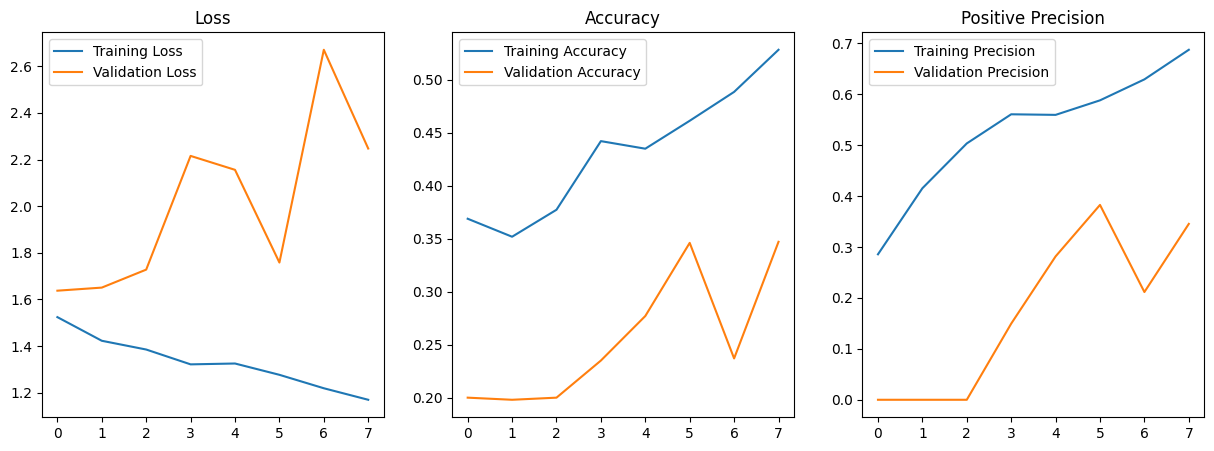

In [84]:
import matplotlib.pyplot as plt

# Obtener los datos de entrenamiento
train_loss = history_model.history['loss']
train_acc = history_model.history['categorical_accuracy']
train_prec = history_model.history['precision']

# Obtener los datos de validación
val_loss = history_model.history['val_loss']
val_acc = history_model.history['val_categorical_accuracy']
val_prec = history_model.history['val_precision']

# Crear subplots para las métricas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Plotear la pérdida
ax1.plot(train_loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Loss')
ax1.legend()

# Plotear la precisión
ax2.plot(train_acc, label='Training Accuracy')
ax2.plot(val_acc, label='Validation Accuracy')
ax2.set_title('Accuracy')
ax2.legend()

# Plotear la precisión de la clase positiva
ax3.plot(train_prec, label='Training Precision')
ax3.plot(val_prec, label='Validation Precision')
ax3.set_title('Positive Precision')
ax3.legend()

plt.show()

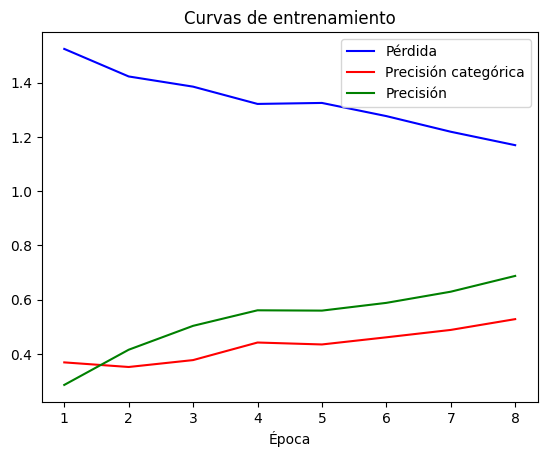

In [85]:
import matplotlib.pyplot as plt

# Datos de entrenamiento
loss = [1.5238186120986938,
  1.4223601818084717,
  1.3847882747650146,
  1.3211380243301392,
  1.324782371520996,
  1.2762656211853027,
  1.2186176776885986,
  1.1691633462905884]
categorical_accuracy = [0.3687500059604645,
  0.35178571939468384,
  0.3772321343421936,
  0.4419642984867096,
  0.4348214268684387,
  0.46116071939468384,
  0.4883928596973419,
  0.528124988079071]
precision =  [0.2857142984867096,
  0.4153846204280853,
  0.5034482479095459,
  0.560675859451294,
  0.5595238208770752,
  0.5880721211433411,
  0.6292397379875183,
  0.6873747706413269]

# Graficar las curvas de entrenamiento
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Pérdida')
plt.plot(epochs, categorical_accuracy, 'r', label='Precisión categórica')
plt.plot(epochs, precision, 'g', label='Precisión')
plt.title('Curvas de entrenamiento')
plt.xlabel('Época')
plt.legend()
plt.show()

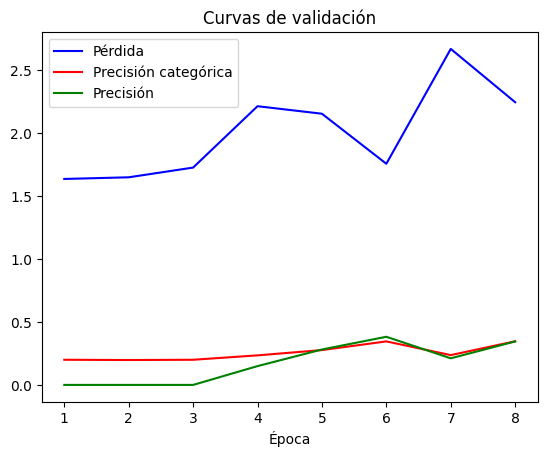

In [86]:
import matplotlib.pyplot as plt

# Datos de entrenamiento
loss = [1.637275218963623,
  1.650496482849121,
  1.7276721000671387,
  2.215587615966797,
  2.1558470726013184,
  1.7580375671386719,
  2.671001434326172,
  2.2472732067108154]
categorical_accuracy = [0.20000000298023224,
  0.1979999989271164,
  0.20000000298023224,
  0.23499999940395355,
  0.2770000100135803,
  0.34599998593330383,
  0.2370000034570694,
  0.34700000286102295]
precision =  [0.0,
  0.0,
  0.0,
  0.1495145559310913,
  0.28160327672958374,
  0.3826979398727417,
  0.2116004228591919,
  0.3454345464706421]

# Graficar las curvas de entrenamiento
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Pérdida')
plt.plot(epochs, categorical_accuracy, 'r', label='Precisión categórica')
plt.plot(epochs, precision, 'g', label='Precisión')
plt.title('Curvas de validación')
plt.xlabel('Época')
plt.legend()
plt.show()